In [2]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

In [2]:
nside = 512
npix = hp.nside2npix(nside)
sky_map = np.zeros(npix)
z=0.1
ADD= cosmo.angular_diameter_distance(z)
R= 5.0 * u.Mpc #physical radius
theta_rad = (R / ADD).to_value(u.dimensionless_unscaled) * u.rad
radius_rad = theta_rad.to_value(u.rad)
n_clusters = 15
B0 = 1e-6 
print (radius_rad)

for i in range(n_clusters):
    # Random center in theta = 30° to 150° , phi = 0–360°
    theta = np.radians(np.random.uniform(30, 150))  # colatitude = 90 - Dec
    phi = np.radians(np.random.uniform(0, 360))     # RA
    vec_center = hp.ang2vec(theta, phi)  # unit vector of cluster center
    pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
    number= hp.ang2pix(512, theta , phi)
   # print (number)
    lon = np.degrees(phi)
    lat = 90 - np.degrees(theta)
    
    #print (np.shape(pixels_in_disc[0]))
    
    for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)  # direction of this pixel
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))  # angular distance
        r_proj = (angle * ADD).to_value(u.Mpc)  # convert to projected radius
       # print (np.shape(pixels_in_disc[0]))

        if r_proj < R.to_value(u.Mpc):
            path_length = 2 * np.sqrt(R.to_value(u.Mpc)**2 - r_proj**2)  # in Mpc
            sky_map[pix] += B0 * path_length  # B⋅dl [T⋅Mpc]

0.012714831593805214


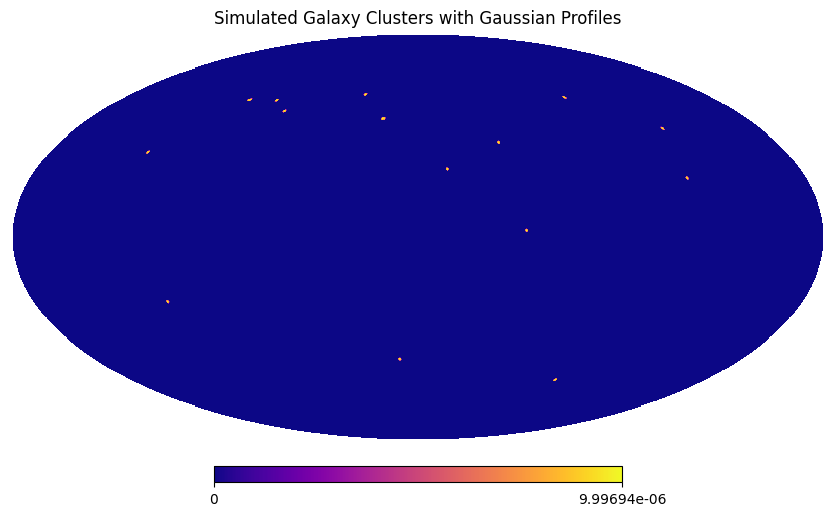

<Figure size 640x480 with 0 Axes>

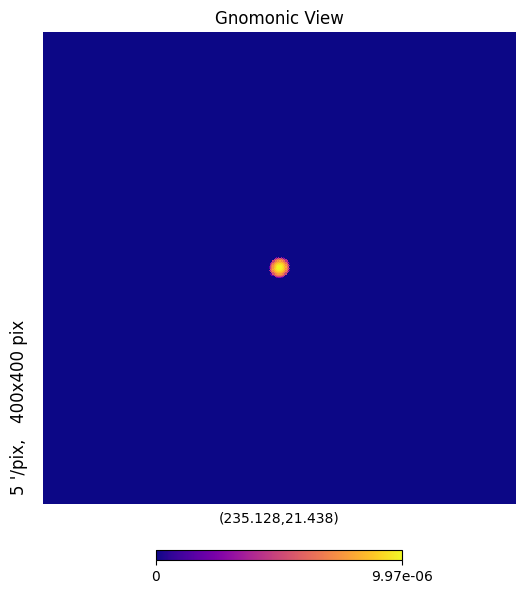

[9.96923790e-07 3.40694290e-06 3.87617275e-06 ... 4.92493776e-06
 4.19639886e-06 1.94313568e-06]


<Figure size 640x480 with 0 Axes>

In [3]:
hp.mollview(sky_map, title="Simulated Galaxy Clusters with Gaussian Profiles", cmap='plasma')
plt.show()
plt.savefig('MultipleclusterwithBmollview.png')
hp.gnomview(sky_map, rot=(lon,lat),reso=5, xsize=400, title="Gnomonic View", cmap='plasma')
plt.show()
plt.savefig('MultipleclusterwithBgnomview.png')
print(sky_map[sky_map != 0]) 

In [4]:
fwhm_deg = 2  # Full width at half max in degrees
fwhm_rad = np.radians(fwhm_deg)
map_smooth = hp.smoothing(sky_map, fwhm=fwhm_rad, verbose=False)

/tmp/ipykernel_51/3835877949.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  map_smooth = hp.smoothing(sky_map, fwhm=fwhm_rad, verbose=False)


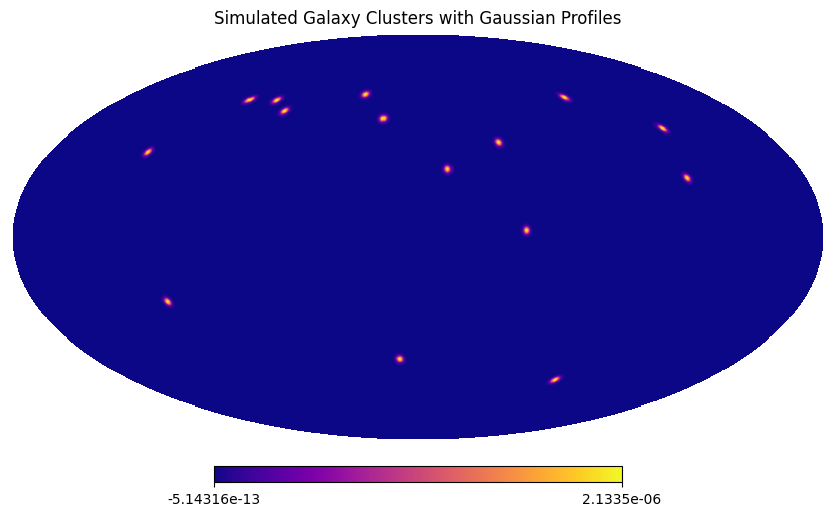

In [5]:
hp.mollview(map_smooth, title="Simulated Galaxy Clusters with Gaussian Profiles", cmap='plasma')
plt.show()

In [6]:
from scipy import integrate

In [7]:
nside = 256
npix = hp.nside2npix(nside)
sky_map = np.zeros(npix)
z=0.1
s=0.5 #steepness
ADD= cosmo.angular_diameter_distance(z)
R= 5.0 * u.Mpc #physical radius
theta_rad = (R / ADD).to_value(u.dimensionless_unscaled) * u.rad
radius_rad = theta_rad.to_value(u.rad)
n_clusters = 1
B0 = 1e-6 
print (theta_rad)

for i in range(n_clusters):
    # Random center in theta = 30° to 150° , phi = 0–360°
    theta = np.radians(np.random.uniform(30, 150))  # colatitude = 90 - Dec
    phi = np.radians(np.random.uniform(0, 360))     # RA
    vec_center = hp.ang2vec(theta, phi)  # unit vector of cluster center
    pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
    number= hp.ang2pix(512, theta , phi)
    print (number)
    lon = np.degrees(phi)
    lat = 90 - np.degrees(theta)
    
    #print (np.shape(pixels_in_disc[0]))
    
    for pix in pixels_in_disc:
      vec = hp.pix2vec(nside, pix)  # direction vector of this pixel
      angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))  # angular distance
      r_proj = (angle * ADD).to_value(u.Mpc)  # projected radius
      R_val = R.to_value(u.Mpc)

      if r_proj < R_val:
            path_length = np.sqrt(R_val**2 - r_proj**2)
            l_min = 0
            l_max = 2 * path_length

            def integrand(l):
                x_proj = np.sqrt(r_proj**2 + (l - path_length)**2)
                return x_proj**(-s)

            integral, error = integrate.quad(integrand, l_min, l_max)
            sky_map[pix] += B0 * integral

0.012714831593805214 rad
798879


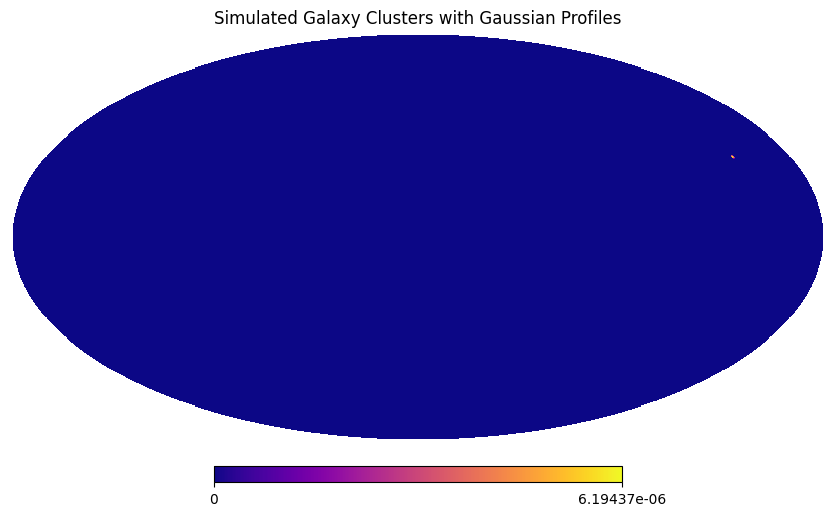

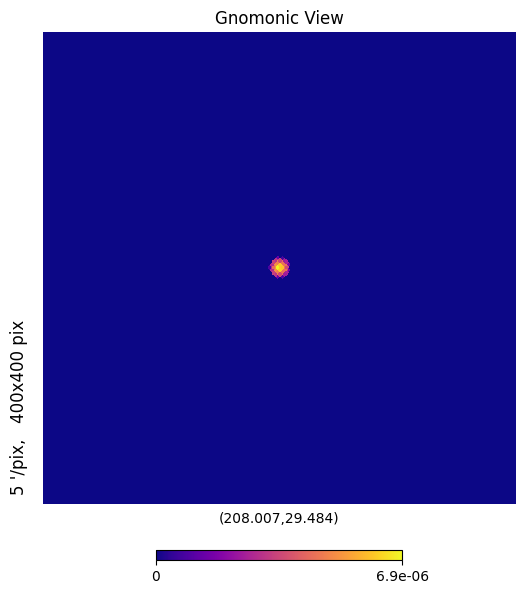

[7.72026676e-07 1.34000781e-06 2.39575934e-06 3.49583161e-06
 2.95551686e-06 2.54555210e-06 4.47743360e-06 4.78928926e-06
 3.35880657e-06 1.57511612e-06 4.50781498e-06 6.19437021e-06
 5.17647705e-06 2.83812425e-06 3.57652723e-06 5.99446627e-06
 6.90240761e-06 4.40386930e-06 8.69431659e-07 1.56153146e-06
 4.50796430e-06 6.20471236e-06 5.17924238e-06 2.83257958e-06
 2.54303726e-06 4.48920651e-06 4.80439764e-06 3.36185812e-06
 2.41913132e-06 3.52757629e-06 2.98231663e-06 9.34633038e-07
 1.44972547e-06]


In [8]:
hp.mollview(sky_map, title="Simulated Galaxy Clusters with Gaussian Profiles", cmap='plasma')
plt.show()
hp.gnomview(sky_map, rot=(lon,lat),reso=5, xsize=400, title="Gnomonic View", cmap='plasma')
plt.show()

print(sky_map[sky_map != 0]) 

for electron density profile

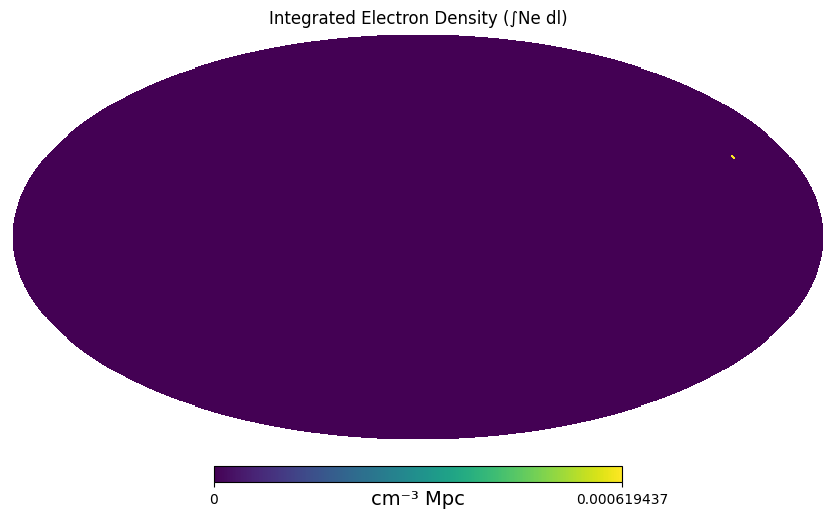

In [9]:
N0 = 1e-4
ne_map = np.zeros(npix)

for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
        r_proj = (angle * ADD).to_value(u.Mpc)
        R_val = R.to_value(u.Mpc)

        if r_proj < R_val:
            path_length = np.sqrt(R_val**2 - r_proj**2)
            l_min, l_max = 0, 2 * path_length

            def integrand(l):
                x_proj = np.sqrt(r_proj**2 + (l - path_length)**2)
                return (x_proj)**(-s)  # Ne(r)

            integral, _ = integrate.quad(integrand, l_min, l_max)
            ne_map[pix] += N0 * integral  # units: cm^-3 × Mpc


hp.mollview(ne_map, title="Integrated Electron Density (∫Ne dl)", unit="cm⁻³ Mpc", norm="hist", cmap='viridis')
plt.show()

coupling_const = 1e-12
N is electron density , so electron density coreesponding to a mass of 10^-13 eV
N0  =1e-2
N = N0* ((x_proj)**(-s))


Gamma = B0 * integral *B0 * integral *coupling_const *coupling_const * freq *(1+z) / modulus(grad N) 
P = e ^ (-(Pi*gamma)/2)

Prob of conversion of axion = 2 * P *(1-P)

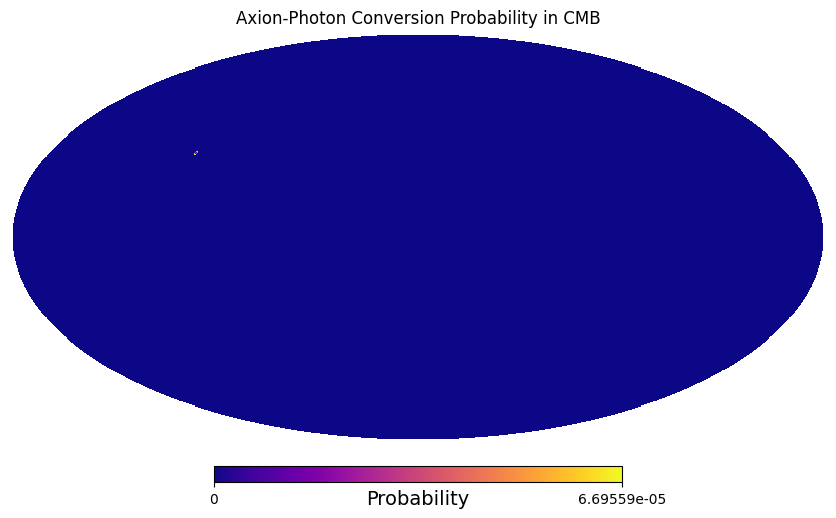

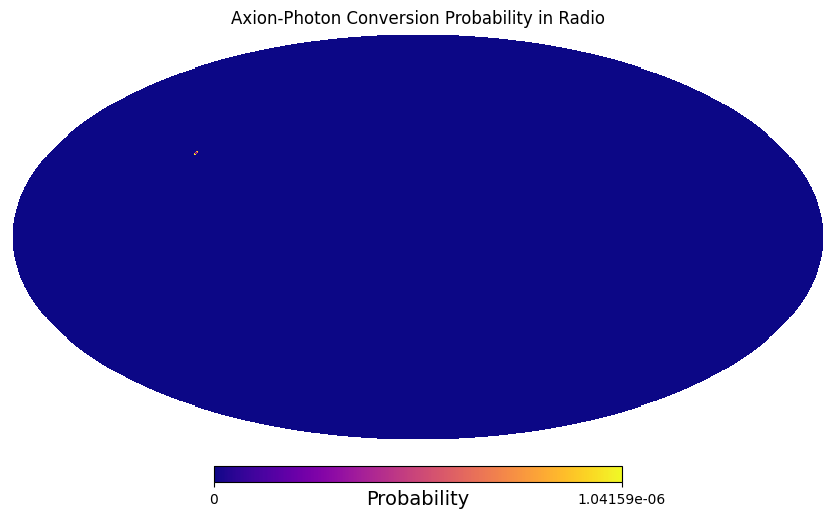

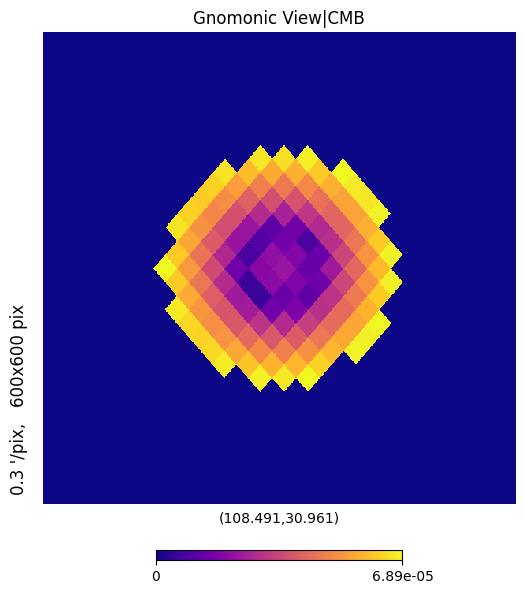

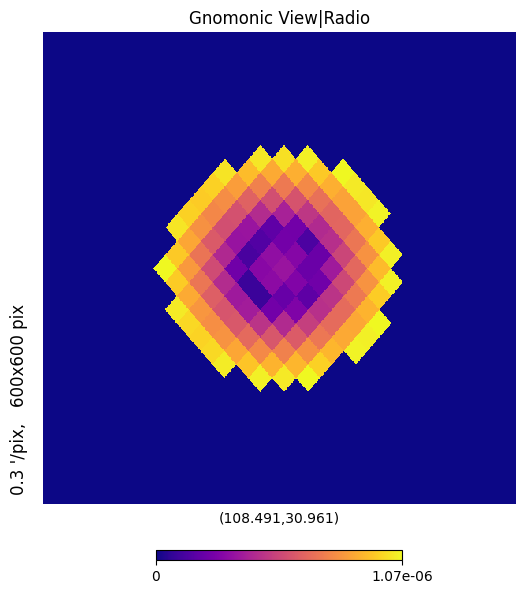

In [11]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

# Healpix setup
nside = 512
npix = hp.nside2npix(nside)
sky_map1 = np.zeros(npix)
sky_map2 = np.zeros(npix)

# Cosmological setup
z = 0.1
s = 0.5
ADD= cosmo.angular_diameter_distance(z).to_value(u.Mpc)

# Cluster radius
R_Mpc = 5.0 
theta_rad = (R_Mpc / ADD)  # small angle approx
radius_rad = theta_rad  # radians


B0 = 1e-6 


N0= 1e-2 
Nm_cm3 = 8e-5
g = 1e-12  # in GeV⁻¹
freq_1 = 90e9
nu1 = freq_1 * (1 + z) 
freq_2 = 1.4e9
nu2 = freq_2 * (1 + z)

# Resonance radius
r_res =1.5625 

#print("Resonance radius (GeV⁻¹):", r_res)

n_clusters = 1

for i in range(n_clusters):
    # Random cluster position
    theta = np.radians(np.random.uniform(30, 150)) 
    phi = np.radians(np.random.uniform(0, 360))     
    vec_center = hp.ang2vec(theta, phi)
    pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
    
    lon = np.degrees(phi)
    lat = 90 - np.degrees(theta)

    # Magnetic field at r_res
  

    for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
        r_proj = angle * ADD
        
        path_length = np.sqrt(R_Mpc**2 - r_proj**2)  # GeV⁻¹

 
        B = B0 * r_res**(-s) 
        Ne = N0 * r_res**(-s)  # GeV³
        dNe_dx = -s * N0 * r_res**(-(s + 1))  # GeV²
        dl_dx = np.sqrt(np.abs (1- (r_proj / r_res)**2) )
        grad_Ne = dNe_dx / dl_dx # GeV²
       # print("-------------")
       # print (grad_Ne)
       # print(B)
       # print(Ne,g,np.abs(grad_Ne),nu)
       
        Factor = 3.09 *1e5 #e^2/ me * epsilon 
        Wp_sq = Ne * Factor 
        Gamma1 = (B**2) * (g**2) * nu1 * 1.95*1e-20 * 1.95*1e-20 * 6.5789474e-25 / (np.abs(grad_Ne) * Factor * 6.5789474e-25 * 6.5789474e-25 *0.6395*1e-38)  # dimensionless
        P1 = np.exp(- (np.pi * Gamma1) / 2)
        Gamma2 = (B**2) * (g**2) * nu2 * 1.95*1e-20 * 1.95*1e-20 * 6.5789474e-25 / (np.abs(grad_Ne) * Factor * 6.5789474e-25 * 6.5789474e-25 *0.6395*1e-38)  # dimensionless
        P2 = np.exp(- (np.pi * Gamma2) / 2)
       # print (Gamma)
       # print (P)
        P1_axion = 2 * P1 * (1 - P1)
        sky_map1[pix] += P1_axion
        P2_axion = 2 * P2 * (1 - P2)
        sky_map2[pix] += P2_axion

# Plot
hp.mollview(sky_map1, title="Axion-Photon Conversion Probability in CMB", unit="Probability", cmap='plasma')
hp.mollview(sky_map2, title="Axion-Photon Conversion Probability in Radio", unit="Probability", cmap='plasma')
plt.show()

hp.gnomview(sky_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|CMB", cmap='plasma')
hp.gnomview(sky_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|Radio", cmap='plasma')
plt.show()

#print("Non-zero sky map values (P_axion):")
#print(sky_map[sky_map != 0])



from astropy.constants import h, k_B, c

T_cmb = 2.725 * (1 + z)  # K
#I_nu = (2 *1e26 * h.value * nu**3) / (c.value**2) * 1 / (np.exp(h.value * nu / (k_B.value * T_cmb)) - 1)  u.Jy/sr  # W·m⁻²·Hz⁻¹·sr⁻¹


# Compute I_nu in Jy/sr
I_nu1 = (2 * h.value * nu1**3) / (c.value**2) / (np.exp(h.value * nu1 / (k_B.value * T_cmb)) - 1) * 1e26  # Jy/sr
delta_I_nu1_map = sky_map1 * I_nu1 * u.Jy/u.sr
I_nu2 = (2 * h.value * nu2**3) / (c.value**2) / (np.exp(h.value * nu2 / (k_B.value * T_cmb)) - 1) * 1e26  # Jy/sr
delta_I_nu2_map = sky_map2 * I_nu2 * u.Jy/u.sr

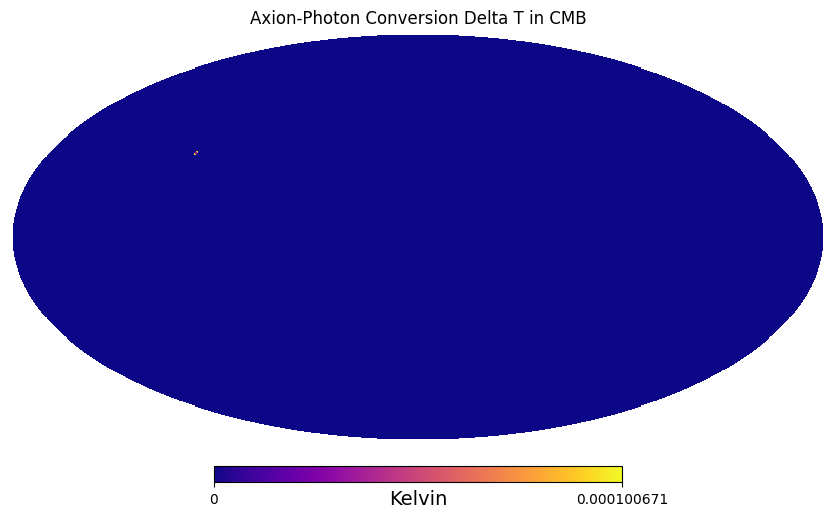

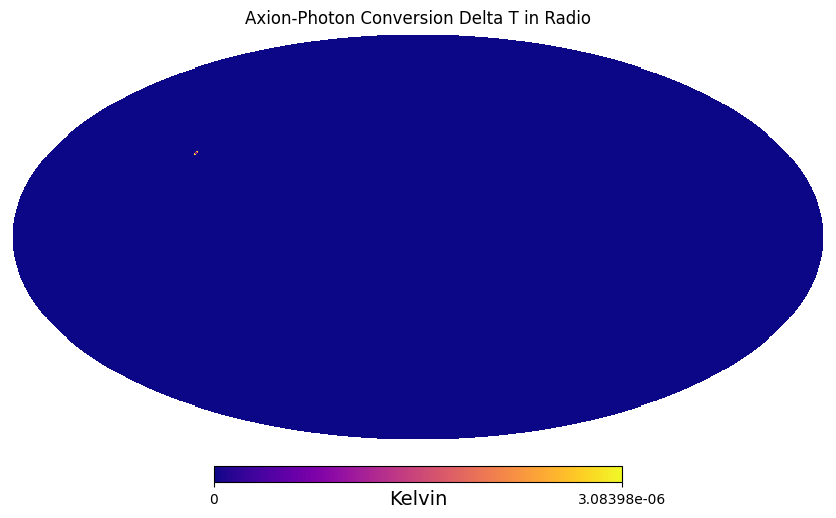

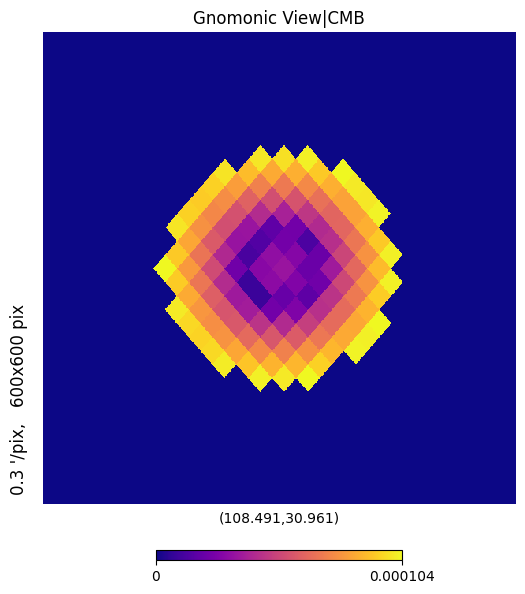

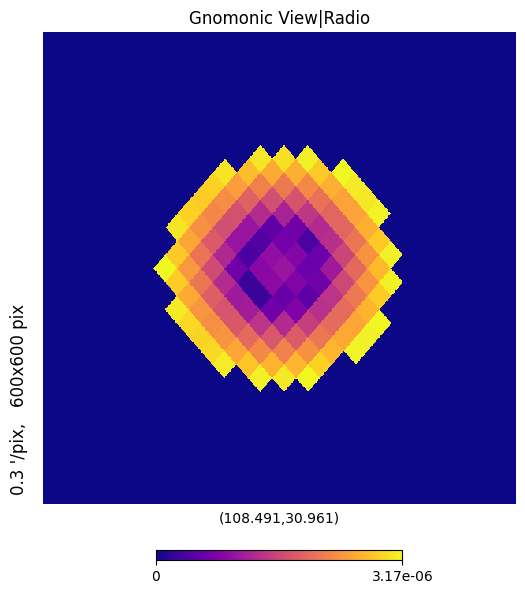

In [13]:
delta_T_map1 = delta_I_nu1_map .to(u.K, u.thermodynamic_temperature(nu1 * u.Hz, T_cmb * u.K))
delta_T_map2 = delta_I_nu2_map .to(u.K, u.thermodynamic_temperature(nu2 * u.Hz, T_cmb * u.K))

hp.mollview(delta_T_map1, title="Axion-Photon Conversion Delta T in CMB", unit="Kelvin", cmap='plasma')
hp.mollview(delta_T_map2, title="Axion-Photon Conversion Delta T in Radio", unit="Kelvin", cmap='plasma')
plt.show()

hp.gnomview(delta_T_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|CMB", cmap='plasma')
hp.gnomview(delta_T_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|Radio", cmap='plasma')
plt.show()

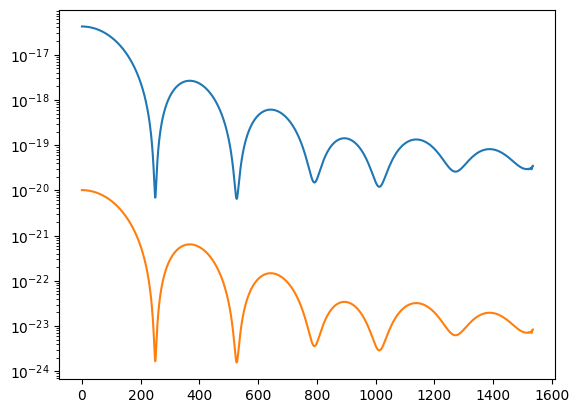

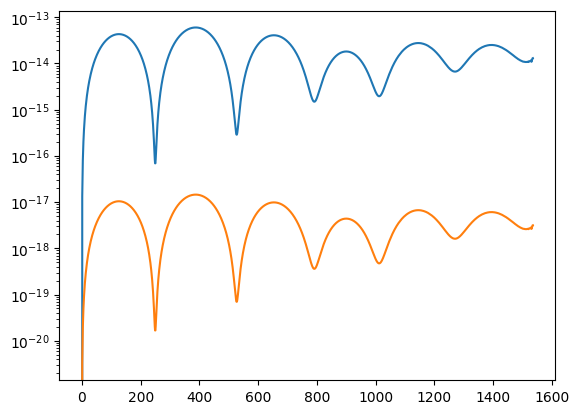

In [15]:
#nonzero_sky_map1 = sky_map1 != 0
#f_sky = np.sum(nonzero_sky_map) / sky_map.size
#print(f_sky)

spectra_list = []
#power spectrum 
cl_1 = hp.anafast(sky_map1)  # Auto-spectrum
l_1 = np.arange(len(cl_1))
cl_2 = hp.anafast(sky_map2)  # Auto-spectrum
l_2 = np.arange(len(cl_2))
plt.semilogy(l_1, cl_1)
plt.semilogy(l_2, cl_2)   #or cl/f_sky
plt.show()


dl_1 = (l_1*(l_1+1) *cl_1/(2*np.pi))
dl_2 = (l_2*(l_2+1) *cl_2/(2*np.pi))
plt.semilogy(l_1, dl_1)
plt.semilogy(l_2, dl_2)
plt.show()

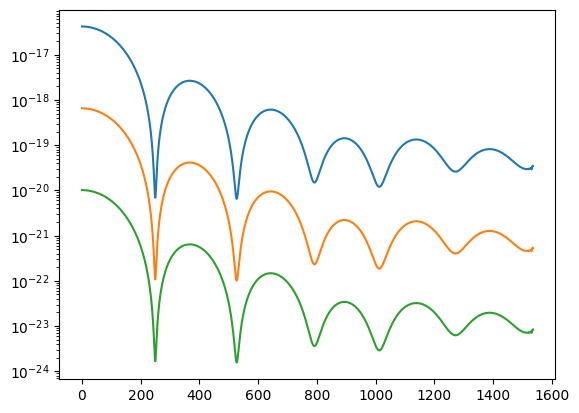

In [27]:
#cross spectrum for the two maps 
CS= hp.sphtfunc.anafast(sky_map1, sky_map2)
plt.semilogy(l_1, cl_1)
plt.semilogy(l_1, CS) #cross spectrum 
plt.semilogy(l_2, cl_2)

In [20]:
array1 = hp.map2alm(sky_map1)
array2 = hp.map2alm(sky_map2)
print (array1)
print (array2)

[ 6.47501641e-09+0.00000000e+00j  5.76861168e-09+0.00000000e+00j
 -1.49258407e-09+0.00000000e+00j ... -1.72781995e-24-4.95278431e-26j
 -4.42930435e-25-9.59478601e-25j -3.86105130e-24-9.16845698e-26j]
[ 1.00726306e-10+0.00000000e+00j  8.97373697e-11+0.00000000e+00j
 -2.32188572e-11+0.00000000e+00j ...  2.44156394e-26+2.86624721e-26j
 -6.49592325e-27-1.50027821e-26j -9.89231575e-27+2.27854584e-26j]


In [21]:
array1 / array2

array([ 64.28327116  +0.j        ,  64.2832713   +0.j        ,
        64.28327026  -0.j        , ..., -30.75871231 +34.08032352j,
        64.6215909   -1.54328312j,  58.51477178+144.04821915j],
      shape=(1180416,))

In [ ]:
cosmic variance, trying to understand structure of galaxy distributiom

beta model for Ne 

ne_sq = (N0*N0* (((r/rcl)^-aplha /1+(r^2 / rcl2)^3beta - alpha/2) * 1/(1+(r/r^r)/rs^r)epsilon/r )+ N0^2/ (1+r2 / rcl2) 3 beta 

Symbolic expression for n_e(r):
            __________________________________________________________________ ↪
           ╱                                -0.92                 -1.333333333 ↪
          ╱                      ⎛  2      ⎞      ⎛     3        ⎞             ↪
         ╱                       ⎜ r       ⎟      ⎜    r         ⎟             ↪
        ╱                 0.0001⋅⎜───── + 1⎟     ⋅⎜────────── + 1⎟             ↪
       ╱        0.01             ⎝10000    ⎠      ⎝1000000000    ⎠             ↪
      ╱      ────────── + ──────────────────────────────────────────────────── ↪
     ╱                3                               2                        ↪
    ╱        ⎛ 2     ⎞                               r                         ↪
   ╱         ⎜r      ⎟                                                         ↪
  ╱          ⎜─── + 1⎟                                                         ↪
╲╱           ⎝100    ⎠                                                       

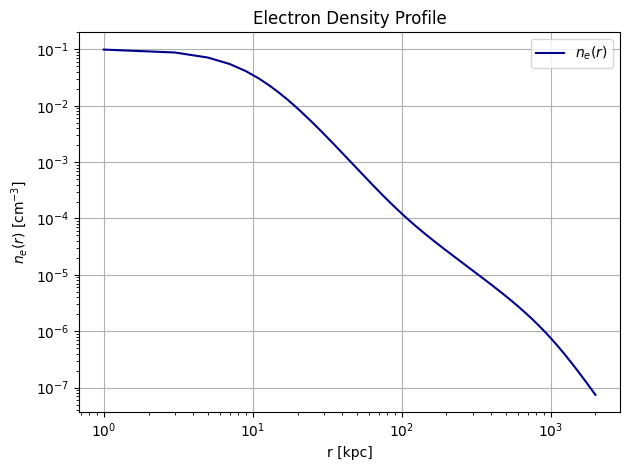

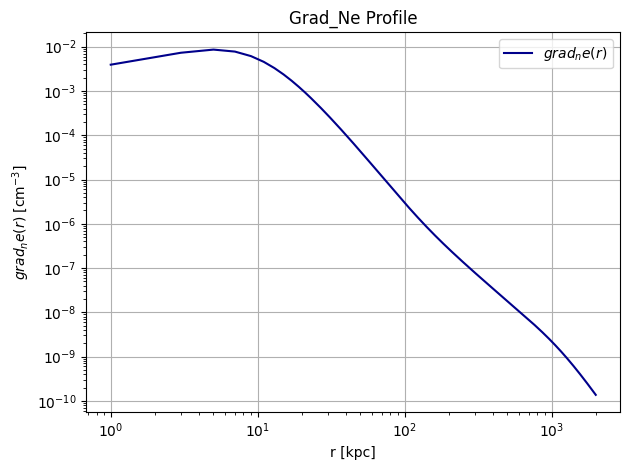

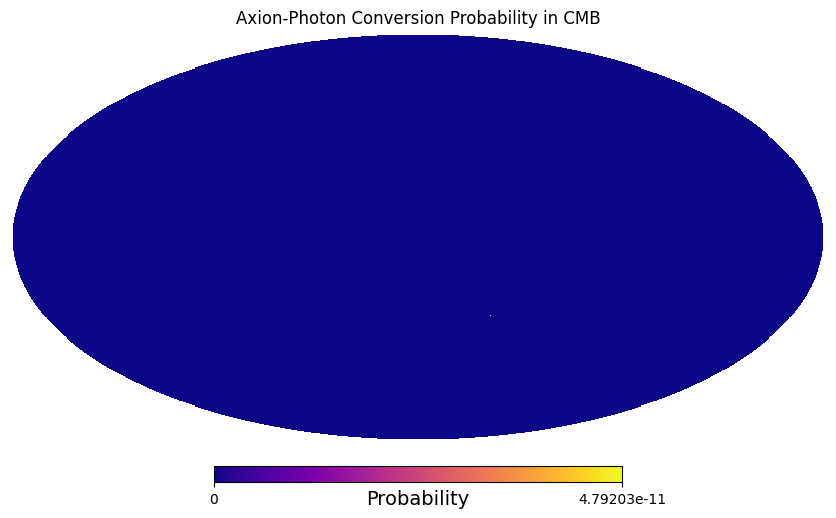

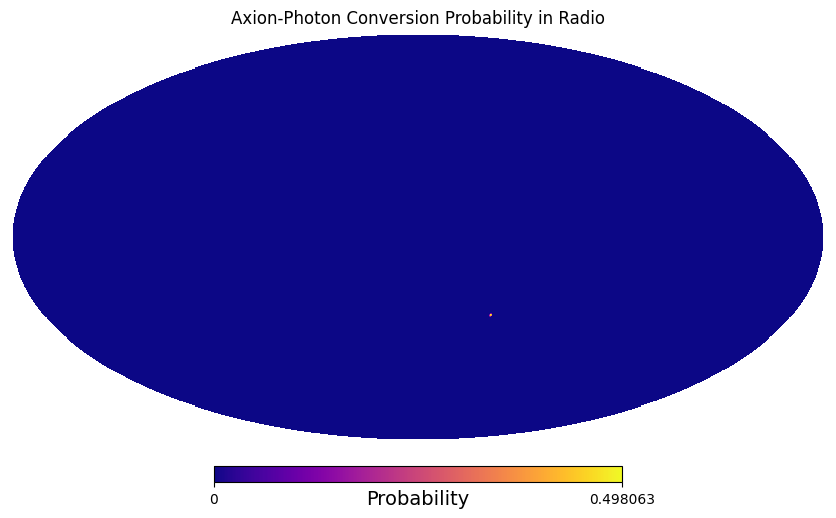

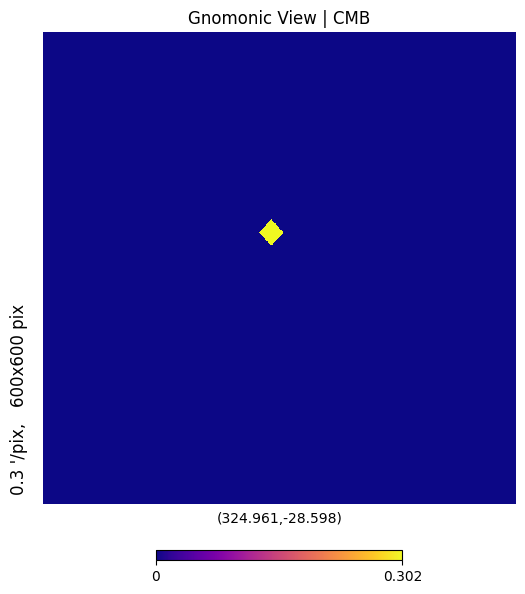

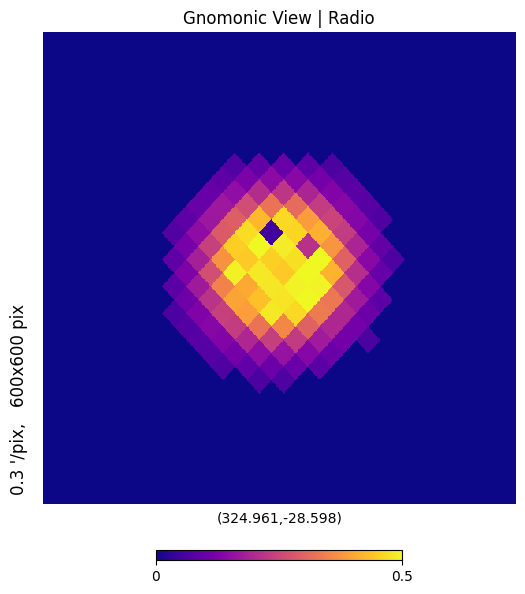

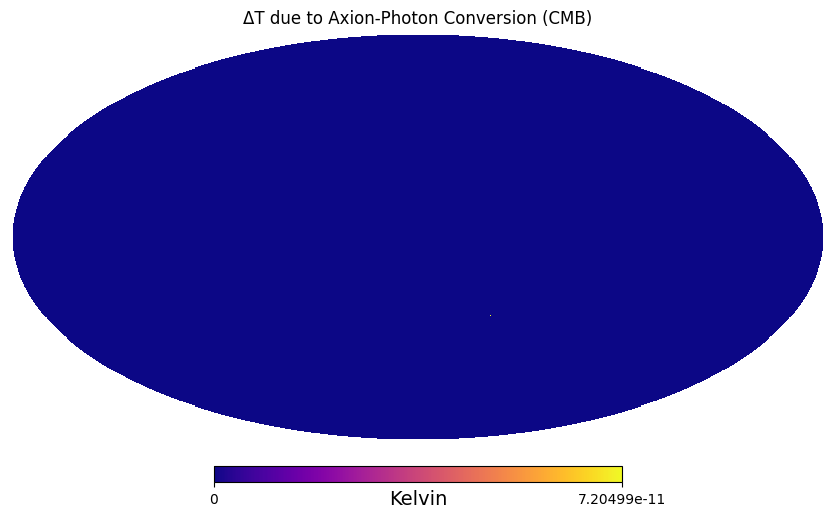

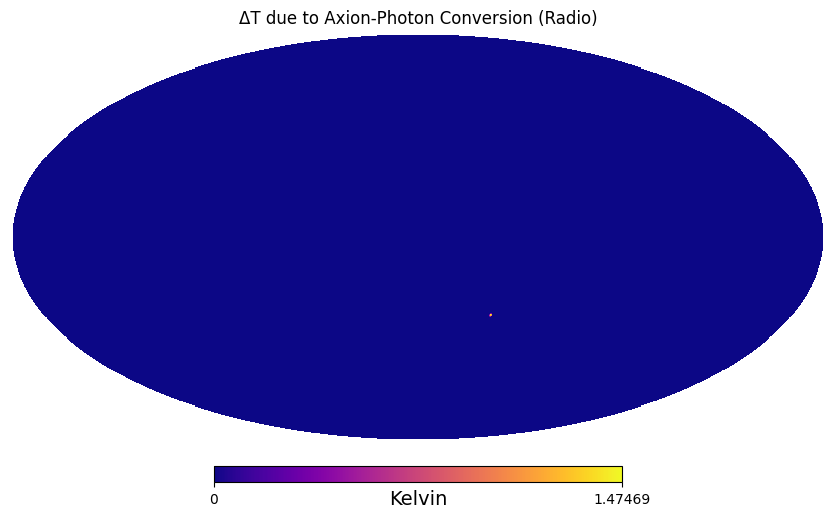

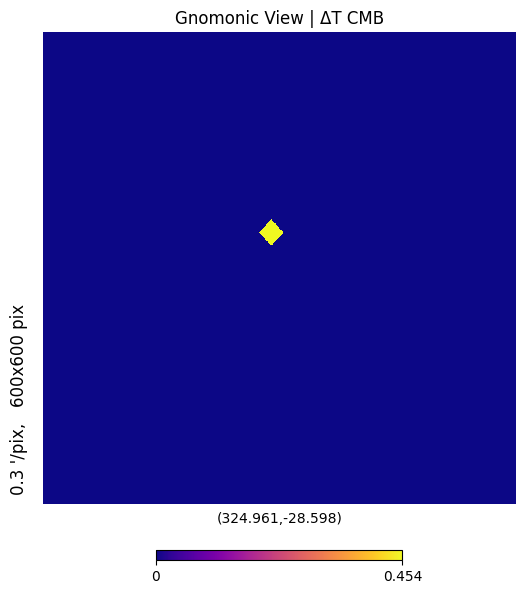

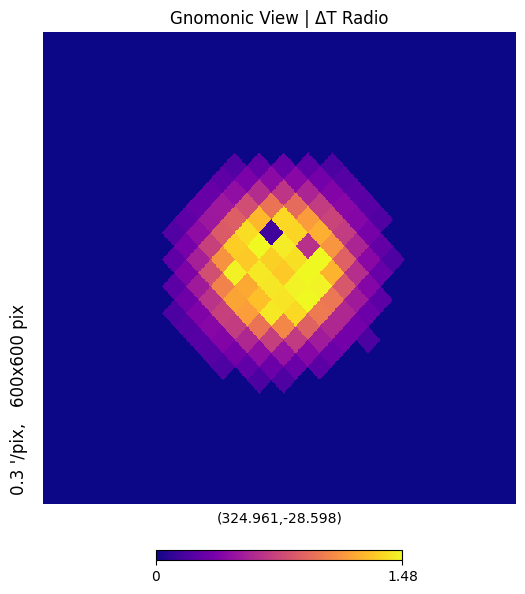

In [68]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
from astropy.constants import h, k_B, c
import sympy as sp

# Healpix setup
nside = 512
npix = hp.nside2npix(nside)
sky_map1 = np.zeros(npix)
sky_map2 = np.zeros(npix)

# Cosmological setup
z = 0.1
s = 0.5
ADD = cosmo.angular_diameter_distance(z).to_value(u.Mpc)

# Cluster radius
R_Mpc = 5.0
theta_rad = (R_Mpc / ADD)
radius_rad = theta_rad

# Frequencies
freq_1 = 90e9
nu1 = freq_1 * (1 + z)
freq_2 = 1.4e9
nu2 = freq_2 * (1 + z)

# Constants
B0 = 1e-6  # Tesla
g = 1e-12  # GeV^-1
r_res = 1.5625  # Mpc
r_res_kpc = r_res * 1e3  # to kpc

# Electron density model parameters
Z = 1.099
n0 = 1e-4
n02 = 1e-1
rc1 = 100
rc2 = 10
rs = 1000
alpha = 2
beta = 0.64
beta2 = 1
gamma = 3
epsilon = 4

r = sp.symbols('r', real=True, positive=True)

# Define the expression
term1 = (n0**2 * (r / rc1)**(-alpha)) / ((1 + (r**2 / rc1**2))**(3 * beta - alpha / 2))
term1 *= 1 / (1 + (r**gamma / rs**gamma))**(epsilon / gamma)
term2 = (n02**2) / ((1 + (r**2 / rc2**2))**(3 * beta2))
ne_sq_expr = (term1 + term2)
ne_expr = sp.sqrt(ne_sq_expr)

# Optional: also print symbolic form
print("Symbolic expression for n_e(r):")
sp.pprint(ne_expr)

# Lambdify the expression
ne_func = sp.lambdify(r, ne_expr, modules='numpy')

# Evaluate over range
r_vals = np.linspace(1, 2000, 1000)  # in kpc, avoid r=0
ne_vals = ne_func(r_vals)

# Plot
plt.loglog(r_vals, ne_vals, label=r'$n_e(r)$', color='darkblue')
plt.xlabel('r [kpc]')
plt.ylabel(r'$n_e(r)$ [cm$^{-3}$]')
plt.title('Electron Density Profile')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Define symbolic expression for n_e(r)
"""r = sp.symbols('r', real=True, positive=True)
term1 = (n0**2 * (r / rc1)**(-alpha)) / ((1 + (r**2 / rc1**2))**(3 * beta - alpha / 2))
term1 *= 1 / (1 + (r**gamma / rs**gamma))**(epsilon / gamma)
term2 = (n02**2) / ((1 + (r**2 / rc2**2))**(3 * beta2))
ne_sq_expr = (term1 + term2)
ne_expr = sp.sqrt(ne_sq_expr)
dne_dr_expr = sp.diff(ne_expr, r)
print (dne_dr_expr)
print(ne_expr)

plot ne_expr vs r """
# Lambdified functions
ne_func = sp.lambdify(r, ne_expr, modules="numpy")
grad_ne_func = sp.lambdify(r, dne_dr_expr, modules="numpy")

grad_ne = np.abs(grad_ne_func(r_vals))
plt.loglog(r_vals, grad_ne, label=r'$grad_ne(r)$', color='darkblue')
plt.xlabel('r [kpc]')
plt.ylabel(r'$grad_ne(r)$ [cm$^{-3}$]')
plt.title('Grad_Ne Profile')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
 

# Evaluate n_e and its gradient at resonance
"""Ne = ne_func(r_res_kpc)
grad_ne = grad_ne_func(r_res_kpc) 
print (grad_ne)"""
# Sky map generation
n_clusters = 1
for i in range(n_clusters):
    theta = np.radians(np.random.uniform(30, 150))
    phi = np.radians(np.random.uniform(0, 360))
    vec_center = hp.ang2vec(theta, phi)
    pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)

    lon = np.degrees(phi)
    lat = 90 - np.degrees(theta)

    for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
        r_proj = angle * ADD
        path_length = np.sqrt(R_Mpc**2 - r_proj**2)
        dl_dr = np.sqrt(np.abs (1- (r_proj / r_res)**2) )
        Grad_ne = grad_ne_func(r_res_kpc) / dl_dr
        B = B0 * r_res**(-s)
        Factor = 3.09e5  # e² / (me * ε₀)
        Wp_sq = Ne * Factor
        denom = np.abs(Grad_ne) * Factor * (6.5789474e-25)**2 * 0.6395e-38

        # Gamma and Probabilities
        Gamma1 = (B**2) * (g**2) * nu1 * (1.95e-20)**2 * 6.5789474e-25 / denom
        P1 = np.exp(- (np.pi * Gamma1) / 2)
       # print (Gamma1)
       # print (P1)
        sky_map1[pix] += 2 * P1 * (1 - P1)

        Gamma2 = (B**2) * (g**2) * nu2 * (1.95e-20)**2 * 6.5789474e-25 / denom
        P2 = np.exp(- (np.pi * Gamma2) / 2)
        #print (Gamma2)
        #print (P2)
        sky_map2[pix] += 2 * P2 * (1 - P2)

# Plot sky maps
hp.mollview(sky_map1, title="Axion-Photon Conversion Probability in CMB", unit="Probability", cmap='plasma')
hp.mollview(sky_map2, title="Axion-Photon Conversion Probability in Radio", unit="Probability", cmap='plasma')
plt.show()

hp.gnomview(sky_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View | CMB", cmap='plasma')
hp.gnomview(sky_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View | Radio", cmap='plasma')
plt.show()

# CMB Intensity → Temperature
T_cmb = 2.725 * (1 + z)
I_nu1 = (2 * h.value * nu1**3) / (c.value**2) / (np.exp(h.value * nu1 / (k_B.value * T_cmb)) - 1) * 1e26
I_nu2 = (2 * h.value * nu2**3) / (c.value**2) / (np.exp(h.value * nu2 / (k_B.value * T_cmb)) - 1) * 1e26

delta_I_nu1_map = sky_map1 * I_nu1 * u.Jy / u.sr
delta_I_nu2_map = sky_map2 * I_nu2 * u.Jy / u.sr

delta_T_map1 = delta_I_nu1_map.to(u.K, u.thermodynamic_temperature(nu1 * u.Hz, T_cmb * u.K))
delta_T_map2 = delta_I_nu2_map.to(u.K, u.thermodynamic_temperature(nu2 * u.Hz, T_cmb * u.K))

hp.mollview(delta_T_map1, title="ΔT due to Axion-Photon Conversion (CMB)", unit="Kelvin", cmap='plasma')
hp.mollview(delta_T_map2, title="ΔT due to Axion-Photon Conversion (Radio)", unit="Kelvin", cmap='plasma')
plt.show()

hp.gnomview(delta_T_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View | ΔT CMB", cmap='plasma')
hp.gnomview(delta_T_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View | ΔT Radio", cmap='plasma')
plt.show()


In [5]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

# Healpix setup
nside = 512
npix = hp.nside2npix(nside)
sky_map1 = np.zeros(npix)
sky_map2 = np.zeros(npix)

# Cosmological setup
z = 0.1
s = 0.5
ADD= cosmo.angular_diameter_distance(z).to_value(u.Mpc)

# Cluster radius
R_Mpc = 5.0 
theta_rad = (R_Mpc / ADD)  # small angle approx
radius_rad = theta_rad  # radians


B0 = 1e-6 


N0= 1e-2 
g = 1e-12  # in GeV⁻¹
freq_1 = 90e9
nu1 = freq_1 * (1 + z) 
freq_2 = 1.4e9
nu2 = freq_2 * (1 + z)

# Resonance radius
r_res =1.5625 

def electron_density_betamodel_profile(
    r=1562.5, #*u.kpc, 
    Z=1.099,
    n0=1e-3 * u.cm**-3,
    n02=1e-1 * u.cm**-3,
    rc1=100 ,#* u.kpc,
    rc2=10 ,#* u.kpc,
    rs=1000, #* u.kpc,
    alpha=2,
    beta=0.64,
    beta2=1,
    gamma=3,
    epsilon=4
):
     # First component
    term1 = (n0**2 * (r / rc1)**(-alpha)) / ((1 + (r**2 / rc1**2))**(3*beta - alpha/2))
    term1 *= 1 / (1 + (r**gamma / rs**gamma))**(epsilon / gamma)

    # Second component
    term2 = (n02**2) / ((1 + (r**2 / rc2**2))**(3 * beta2))

    # Total profile
    ne_sq = Z * (term1 + term2)
    ne = np.sqrt(ne_sq)
    dne_dr = sp.diff(ne,r)
    
    return dne_dr #.to(u.cm**-6)

    
#ne_sq = electron_density_betamodel_profile(r_res)


# Convert to numerical function using lambdify
#grad_ne_func = sp.lambdify((l), dne_dl, modules="numpy")


n_clusters = 1

for i in range(n_clusters):
    # Random cluster position
    theta = np.radians(np.random.uniform(30, 150)) 
    phi = np.radians(np.random.uniform(0, 360))     
    vec_center = hp.ang2vec(theta, phi)
    pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
    
    lon = np.degrees(phi)
    lat = 90 - np.degrees(theta)

    # Magnetic field at r_res
  

    for pix in pixels_in_disc:
        vec = hp.pix2vec(nside, pix)
        angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
        r_proj = angle * ADD
        
        path_length = np.sqrt(R_Mpc**2 - r_proj**2)  # GeV⁻¹
        dl_dr = np.sqrt(np.abs (1- (r_proj / r_res)**2) )
        grad_ne = electron_density_betamodel_profile(r_res) * dr_dl    #dne_dl
        B = B0 * r_res**(-s)
        Factor = 3.09 *1e5 #e^2/ me * epsilon 
        Wp_sq = Ne * Factor 
        Gamma1 = (B**2) * (g**2) * nu1 * 1.95*1e-20 * 1.95*1e-20 * 6.5789474e-25 / (np.abs(grad_ne) * Factor * 6.5789474e-25 * 6.5789474e-25 *0.6395*1e-38)  # dimensionless
        P1 = np.exp(- (np.pi * Gamma1) / 2)
        Gamma2 = (B**2) * (g**2) * nu2 * 1.95*1e-20 * 1.95*1e-20 * 6.5789474e-25 / (np.abs(grad_ne) * Factor * 6.5789474e-25 * 6.5789474e-25 *0.6395*1e-38)  # dimensionless
        P2 = np.exp(- (np.pi * Gamma2) / 2)
       # print (Gamma)
       # print (P)
        P1_axion = 2 * P1 * (1 - P1)
        sky_map1[pix] += P1_axion
        P2_axion = 2 * P2 * (1 - P2)
        sky_map2[pix] += P2_axion

# Plot
hp.mollview(sky_map1, title="Axion-Photon Conversion Probability in CMB", unit="Probability", cmap='plasma')
hp.mollview(sky_map2, title="Axion-Photon Conversion Probability in Radio", unit="Probability", cmap='plasma')
plt.show()

hp.gnomview(sky_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|CMB", cmap='plasma')
hp.gnomview(sky_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|Radio", cmap='plasma')
plt.show()

from astropy.constants import h, k_B, c

T_cmb = 2.725 * (1 + z)  # K
#I_nu = (2 *1e26 * h.value * nu**3) / (c.value**2) * 1 / (np.exp(h.value * nu / (k_B.value * T_cmb)) - 1)  u.Jy/sr  # W·m⁻²·Hz⁻¹·sr⁻¹


# Compute I_nu in Jy/sr
I_nu1 = (2 * h.value * nu1**3) / (c.value**2) / (np.exp(h.value * nu1 / (k_B.value * T_cmb)) - 1) * 1e26  # Jy/sr
delta_I_nu1_map = sky_map1 * I_nu1 * u.Jy/u.sr
I_nu2 = (2 * h.value * nu2**3) / (c.value**2) / (np.exp(h.value * nu2 / (k_B.value * T_cmb)) - 1) * 1e26  # Jy/sr
delta_I_nu2_map = sky_map2 * I_nu2 * u.Jy/u.sr

delta_T_map1 = delta_I_nu1_map .to(u.K, u.thermodynamic_temperature(nu1 * u.Hz, T_cmb * u.K))
delta_T_map2 = delta_I_nu2_map .to(u.K, u.thermodynamic_temperature(nu2 * u.Hz, T_cmb * u.K))

hp.mollview(delta_T_map1, title="Axion-Photon Conversion Delta T in CMB", unit="Kelvin", cmap='plasma')
hp.mollview(delta_T_map2, title="Axion-Photon Conversion Delta T in Radio", unit="Kelvin", cmap='plasma')
plt.show()

hp.gnomview(delta_T_map1, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|CMB", cmap='plasma')
hp.gnomview(delta_T_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View|Radio", cmap='plasma')
plt.show()



ValueError: diff requires input that is at least one dimensional

In [6]:
ne_sq = N0**2 * (
    ((r / rcl)**(-alpha) / (1 + (r**2 / rcl**2))**(3*beta - alpha/2)) * 
    1 / ((1 + (r / rs)**r)**epsilon * r)
    + 1 / (1 + r**2 / rcl**2)**(3 * beta)
)

NameError: name 'rcl' is not defined

In [7]:
!pip install sympy

In [8]:
import sympy as sp
l, b = sp.symbols('l b', real=True, positive=True)
r = sp.sqrt(l**2 + b**2)
differentiate = sp.diff(r,l)
print (differentiate)

l/sqrt(b**2 + l**2)


In [9]:
import numpy as np
import astropy.units as u
import sympy as sp

def electron_density_betamodel_profile(
    r=1562.5, #*u.kpc, 
    Z=1.099,
    n0=1e-3 * u.cm**-3,
    n02=1e-1 * u.cm**-3,
    rc1=100 ,#* u.kpc,
    rc2=10 ,#* u.kpc,
    rs=1000, #* u.kpc,
    alpha=2,
    beta=0.64,
    beta2=1,
    gamma=3,
    epsilon=4
):
    """
    Compute the electron density squared profile n_e^2(r) for a galaxy cluster.

    Parameters:
    -----------
    r : Quantity array
        Radius from the cluster center (with units, e.g., kpc or Mpc)
    Z : float
        Metallicity factor
    n0 : Quantity
        Outer region electron density
    n02 : Quantity
        Inner region electron density
    rc1 : Quantity
        Outer core radius
    rc2 : Quantity
        Inner core radius
    rs : Quantity
        Scaling radius
    alpha : float
        Cusp slope parameter
    beta : float
        Outer β exponent
    beta2 : float
        Inner β exponent
    gamma : float
        Transition width parameter
    epsilon : float
        Knee slope

    Returns:
    --------
    ne_sq : Quantity array
        Electron density squared profile (with units cm⁻⁶)
    """

    # First component
    term1 = (n0**2 * (r / rc1)**(-alpha)) / ((1 + (r**2 / rc1**2))**(3*beta - alpha/2))
    term1 *= 1 / (1 + (r**gamma / rs**gamma))**(epsilon / gamma)

    # Second component
    term2 = (n02**2) / ((1 + (r**2 / rc2**2))**(3 * beta2))

    # Total profile
    ne_sq = Z * (term1 + term2)

    return ne_sq #.to(u.cm**-6)

    
ne_sq = electron_density_betamodel_profile(r_res)
ne = np.sqrt(ne_sq)
l, b = sp.symbols('l b', real=True, positive=True)
r = sp.sqrt(l**2 + b**2)

# Convert to numerical function using lambdify
grad_ne_func = sp.lambdify((l, b), dne_dl, modules="numpy")




NameError: name 'dne_dl' is not defined

In [10]:
import sympy as sp

# Define symbols (unitless)
l, b = sp.symbols('l b', real=True, positive=True)
r = sp.sqrt(l**2 + b**2)

# Parameters (unitless or symbolic)
Z, n0, n02, rc1, rc2, rs = sp.symbols('Z n0 n02 rc1 rc2 rs', real=True, positive=True)
alpha, beta, beta2, gamma, epsilon = sp.symbols('alpha beta beta2 gamma epsilon', real=True, positive=True)

# Modified beta-model electron density squared
term1 = (n0**2 * (r / rc1)**(-alpha)) / (1 + (r**2 / rc1**2))**(3*beta - alpha/2)
term1 *= 1 / (1 + (r**gamma / rs**gamma))**(epsilon / gamma)

term2 = (n02**2) / (1 + (r**2 / rc2**2))**(3 * beta2)

ne_sq = Z * (term1 + term2)  # n_e(r)^2

# Compute n_e = sqrt(n_e^2)
ne = sp.sqrt(ne_sq)

# Derivative of n_e w.r.t. path length l
dne_dl = sp.diff(ne, l)

# Optionally simplify the expression
dne_dl_simplified = sp.simplify(dne_dl)

# Display
sp.pprint(dne_dl_simplified, use_unicode=True)


                                          -(5⋅ε + 2⋅γ)                         ↪
                                          ─────────────                        ↪
                                               2⋅γ                             ↪
                5⋅α     ⎛               γ⎞                                3⋅β₂ ↪
              - ─── - 2 ⎜               ─⎟                              - ──── ↪
                 4      ⎜               2⎟                                 2   ↪
     ⎛ 2    2⎞          ⎜  γ   ⎛ 2    2⎞ ⎟              ⎛ 2    2      2⎞       ↪
√Z⋅l⋅⎝b  + l ⎠         ⋅⎝rs  + ⎝b  + l ⎠ ⎠             ⋅⎝b  + l  + rc₂ ⎠       ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
                            

In [11]:
r = np.linspace(1, 2000, 1000) * u.kpc
ne2 = electron_density_squared_profile(r)

import matplotlib.pyplot as plt
plt.loglog(r.to(u.kpc), ne2.value)
plt.xlabel("Radius [kpc]")
plt.ylabel(r"$n_e^2\ [\mathrm{cm}^{-6}]$")
plt.title("Electron Density Beta Model Profile")
plt.grid(True, which='both')
plt.show()
plt.savefig("electron_density_beta_model.png", dpi=300, bbox_inches='tight')


NameError: name 'electron_density_squared_profile' is not defined

In [5]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

# Healpix setup
nside = 256
npix = hp.nside2npix(nside)
sky_map2 = np.zeros(npix)

# Cosmological setup
z = 0.1
s = 0.5
ADD= cosmo.angular_diameter_distance(z).to_value(u.Mpc)

# Cluster radius
R_Mpc = 5.0 
theta_rad = (R_Mpc / ADD)  # small angle approx
radius_rad = theta_rad  # radians

r_res =1.5625

n_clusters = 1

B0 = 1e-6 
N0= 1e-2 
Nm_cm3 = 8e-5
g = 1e-12  # in GeV⁻¹

frequencies = np.logspace(np.log10(90e6), np.log10(200e9), 10) * u.Hz  # 10 log-spaced points

for nu in frequencies:
    print(f"\nProcessing frequency: {nu:.2e}")

    sky_map2 = np.zeros(npix)
    T_cmb = 2.725 * (1 + z) * u.K
    nu_obs = nu.to_value(u.Hz)

# Resonance radius

    for i in range(n_clusters):
    # Random cluster position
        theta = np.radians(np.random.uniform(30, 150)) 
        phi = np.radians(np.random.uniform(0, 360))     
        vec_center = hp.ang2vec(theta, phi)
        pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
    
        lon = np.degrees(phi)
        lat = 90 - np.degrees(theta)


  

    for pix in pixels_in_disc:
                vec = hp.pix2vec(nside, pix)
                angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
                r_proj = angle * ADD
            
                path_length = np.sqrt(R_Mpc**2 - r_proj**2)  # GeV⁻¹
    
     
                B = B0 * r_res**(-s) 
                Ne = N0 * r_res**(-s)  # GeV³
                dNe_dx = -s * N0 * r_res**(-(s + 1))  # GeV²
                dl_dx = np.sqrt(np.abs (1- (r_proj / r_res)**2) )
                grad_Ne = dNe_dx / dl_dx # GeV²
               
                Factor = 3.09 *1e5 #e^2/ me * epsilon 
                Wp_sq = Ne * Factor 
                Gamma = (B**2) * (g**2) * nu_obs * 1.95*1e-20 * 1.95*1e-20 * 6.5789474e-25 / (np.abs(grad_Ne) * Factor * 6.5789474e-25 * 6.5789474e-25 *0.6395*1e-38)  # dimensionless
                P = np.exp(- (np.pi * Gamma) / 2)
                P_axion = 2 * P * (1 - P)
                sky_map2[pix] += P_axion

# Plot
        hp.mollview(sky_map2, title="Axion-Photon Conversion ", unit="Kelvin", cmap='plasma')
        plt.show()

        hp.gnomview(sky_map2, rot=(lon, lat), reso=0.3, xsize=600, title="Gnomonic View", cmap='plasma')
        plt.show()

print("Non-zero sky map values (P_axion):")
print(sky_map2[sky_map2 != 0])


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 77)


Processing frequency: 9.00e+07 Hz


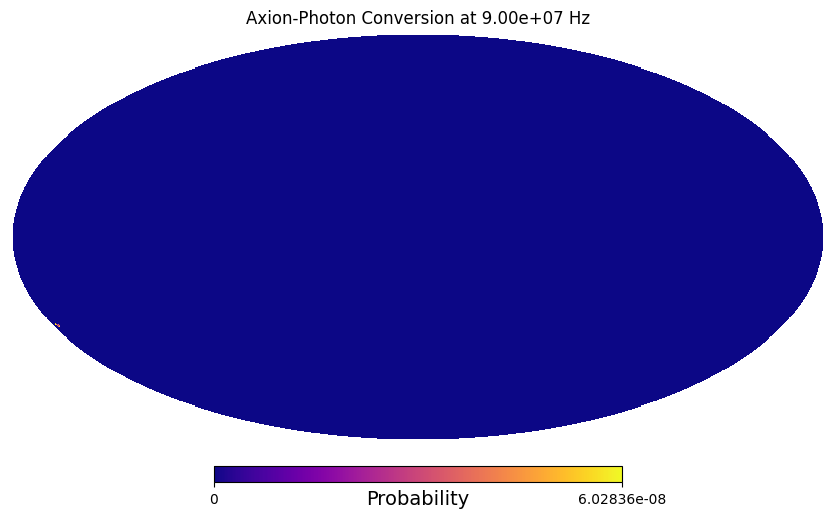

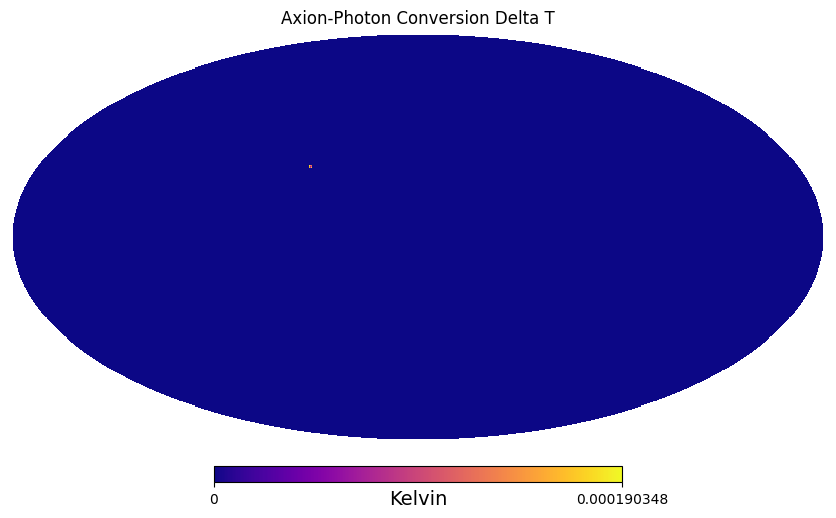


Processing frequency: 4.24e+09 Hz


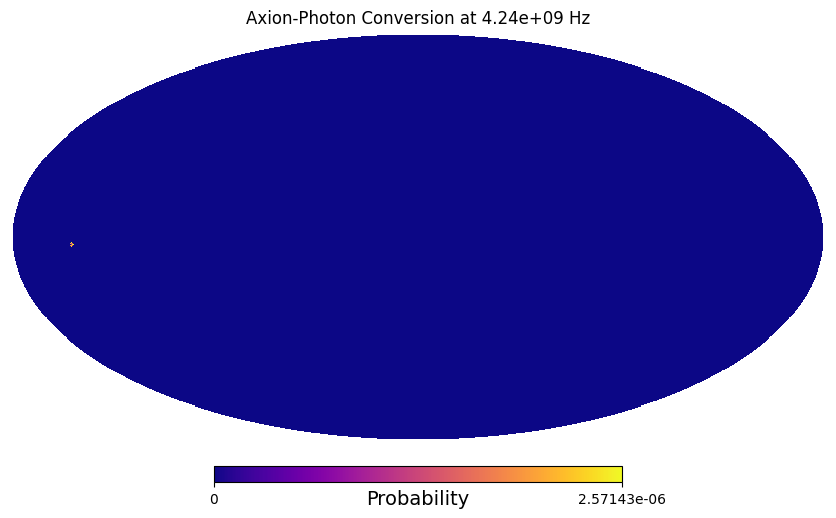

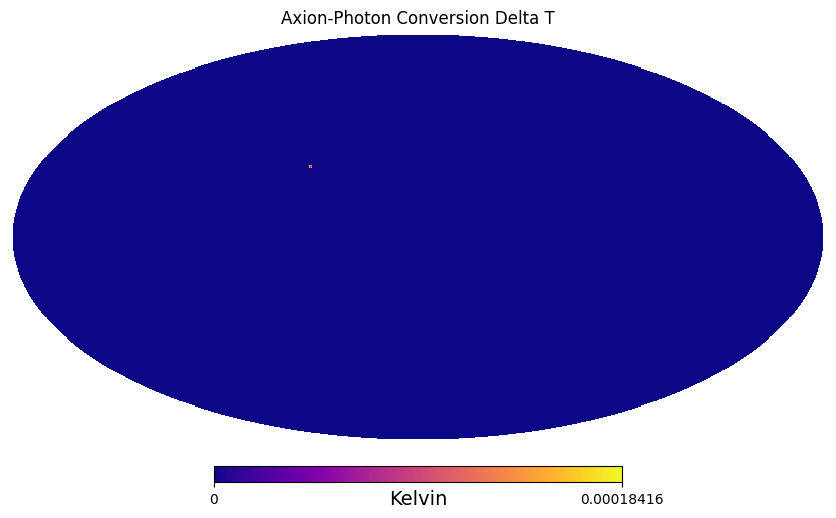


Processing frequency: 2.00e+11 Hz


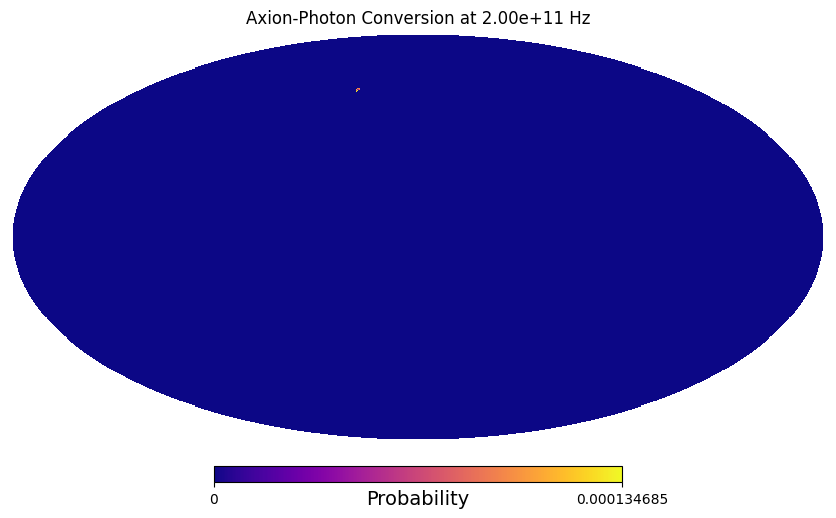

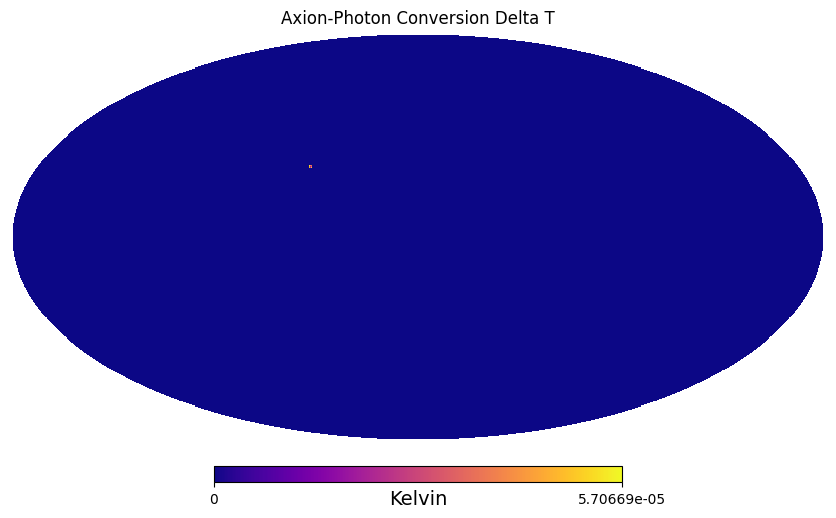

In [54]:
nside = 128  # Temporarily reduce resolution
npix = hp.nside2npix(nside)

frequencies = np.logspace(np.log10(90e6), np.log10(200e9), 3) * u.Hz  # Just 3 frequencies for test

for nu in frequencies:
    print(f"\nProcessing frequency: {nu:.2e}")
    sky_map2 = np.zeros(npix)
    T_cmb = 2.725 * (1 + z) * u.K
    nu_obs = nu.to_value(u.Hz)

    for i in range(n_clusters):
        theta = np.radians(np.random.uniform(30, 150)) 
        phi = np.radians(np.random.uniform(0, 360))     
        vec_center = hp.ang2vec(theta, phi)
        pixels_in_disc = hp.query_disc(nside, vec_center, radius_rad)
        lon = np.degrees(phi)
        lat = 90 - np.degrees(theta)

        for pix in pixels_in_disc:
            vec = hp.pix2vec(nside, pix)
            angle = np.arccos(np.clip(np.dot(vec, vec_center), -1, 1))
            r_proj = angle * ADD
            if r_proj >= R_Mpc:
                continue

            path_length = np.sqrt(R_Mpc**2 - r_proj**2)
            B = B0 * r_res**(-s) 
            Ne = N0 * r_res**(-s)
            dNe_dx = -s * N0 * r_res**(-(s + 1))
            dl_dx = np.sqrt(np.abs(1 - (r_proj / r_res)**2))
            grad_Ne = dNe_dx / dl_dx
            Factor = 3.09e5

            Gamma = (B**2) * (g**2) * nu_obs * (1.95e-20)**2 * 6.5789474e-25 / (np.abs(grad_Ne) * Factor * (6.5789474e-25)**2 * 0.6395e-38)
            P = np.exp(- (np.pi * Gamma) / 2)
            P_axion = 2 * P * (1 - P)
            sky_map2[pix] += P_axion

    hp.mollview(sky_map2, title=f"Axion-Photon Conversion at {nu:.2e}", unit="Probability", cmap='plasma')
    plt.show()

    from astropy.constants import h, k_B, c

    T_cmb = 2.725 * (1 + z)  # K
#I_nu = (2 *1e26 * h.value * nu**3) / (c.value**2) * 1 / (np.exp(h.value * nu / (k_B.value * T_cmb)) - 1)  u.Jy/sr  # W·m⁻²·Hz⁻¹·sr⁻¹


# Compute I_nu in Jy/sr
    I_nu = (2 * h.value * nu_obs**3) / (c.value**2) / (np.exp(h.value * nu.to_value(u.Hz)/ (k_B.value * T_cmb)) - 1) * 1e26  # Jy/sr

    delta_I_nu_map = sky_map * I_nu * u.Jy/u.sr

    delta_T_map = delta_I_nu_map .to(u.K, u.thermodynamic_temperature(nu_obs * u.Hz, T_cmb * u.K))

    hp.mollview(delta_T_map, title="Axion-Photon Conversion Delta T", unit="Kelvin", cmap='plasma')
    plt.show()

